### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [598]:
# write you code here
import numpy as np
import random as rm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [601]:
# Reading the dataset provided and loading only the first 2000 records
insta_df = pd.read_csv("Instagram_data.csv", nrows = 2000)

# Seeing the dataframe
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [604]:
# Printing the first 10 rows of the dataframe
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [606]:
# Shape of the dataframe
insta_df.shape

(2000, 13)

In [608]:
# Column names of the dataframe
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [611]:
# Printing the length of the dataframe (no of rows)
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [614]:
# Print the datatypes of the columns in dataframe
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [617]:
# Removing User uuid
del insta_df['User uuid']

# Removing User Likes Score
del insta_df['Likes Score']

# Removing Date Posted column 
del insta_df['Date Posted']

#We are not removing other date and time columns as we think day and hour of the day might influence the number of likes. 
#And even if they are not important as shrinkage methods will take care of them.
#For now we are not removing the other date and time columns - Year, Month, Day, Hour, Minute

# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
0,506,657,Image,3,11,2019,5,12,21,18
1,385,657,Image,0,1,2019,5,12,14,25
2,373,666,Images,4,15,2019,5,3,15,18
3,312,667,Images,4,1,2019,5,2,16,40
4,513,674,Images,5,0,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...
1995,58,186,Image,0,84,2020,8,25,18,9
1996,81,193,Video,4,5,2020,8,18,2,39
1997,251,194,Image,4,13,2020,8,17,1,17
1998,962,197,Images,0,38,2020,8,14,18,48


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [620]:
# Printing the number of unique values in 'Type' column
len(insta_df['Type'].unique())

3

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [623]:
# Encoding "Type" with label encoder
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
insta_df['Type'] = labelencoder.fit_transform(insta_df['Type'])

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
0,506,657,0,3,11,2019,5,12,21,18
1,385,657,0,0,1,2019,5,12,14,25
2,373,666,1,4,15,2019,5,3,15,18
3,312,667,1,4,1,2019,5,2,16,40
4,513,674,1,5,0,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...
1995,58,186,0,0,84,2020,8,25,18,9
1996,81,193,2,4,5,2020,8,18,2,39
1997,251,194,0,4,13,2020,8,17,1,17
1998,962,197,1,0,38,2020,8,14,18,48


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [626]:
# a. How many NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

In [628]:
# b. How many NaNs as a percentage of overall data
insta_df.isnull().sum()/len(insta_df)*100

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
Year                     0.0
Month                    0.0
Day                      0.0
Hour                     0.0
Minute                   0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [631]:
# Featuers X:
X = insta_df.drop('Likes', axis = 1)
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
0,657,0,3,11,2019,5,12,21,18
1,657,0,0,1,2019,5,12,14,25
2,666,1,4,15,2019,5,3,15,18
3,667,1,4,1,2019,5,2,16,40
4,674,1,5,0,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...
1995,186,0,0,84,2020,8,25,18,9
1996,193,2,4,5,2020,8,18,2,39
1997,194,0,4,13,2020,8,17,1,17
1998,197,1,0,38,2020,8,14,18,48


In [633]:
# Target y:
y = insta_df['Likes']
##
y
print(y.describe())

count    2000.00000
mean      311.01700
std       665.47768
min         3.00000
25%        50.00000
50%       131.50000
75%       359.00000
max      9831.00000
Name: Likes, dtype: float64


    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

<Axes: >

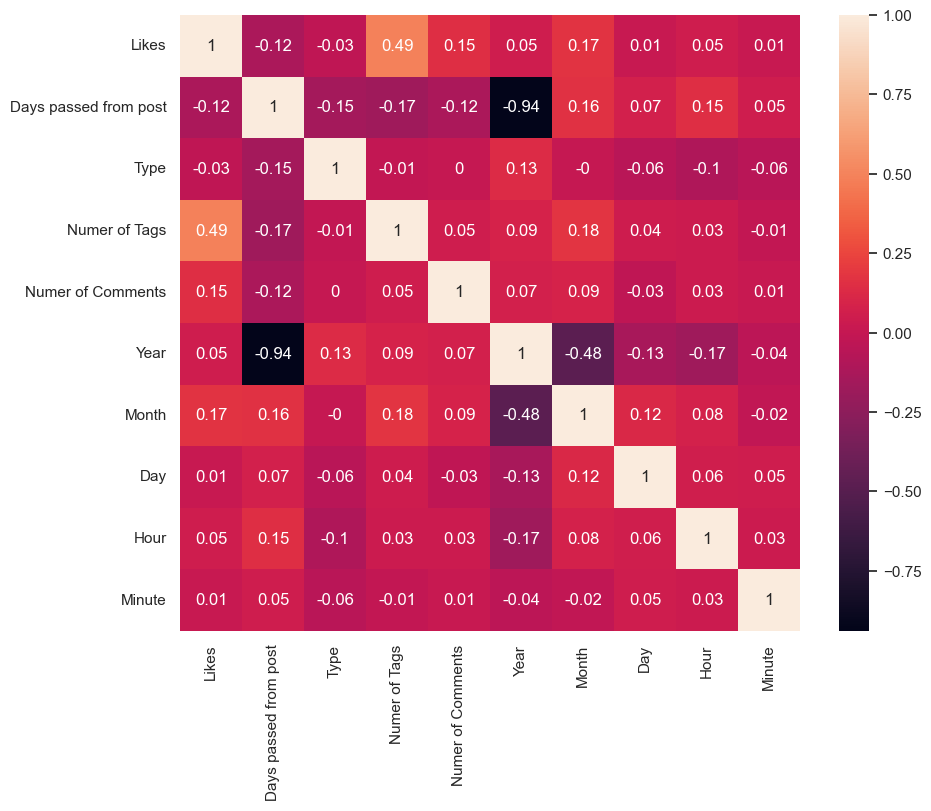

In [636]:
# Checking for multicollinearity
cor = insta_df.corr().round(2)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=cor, annot=True)

    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

From the above plot, we can observe that there is high collinearity between 'Days passed from the post' and 'Year'. This is expected as they are both inversely proportional in nature i.e., the earlier year it is, the more number of days would have been passed by. We are not removing any of them as they might offer any information. If not we will know through the shrinkage methods.

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

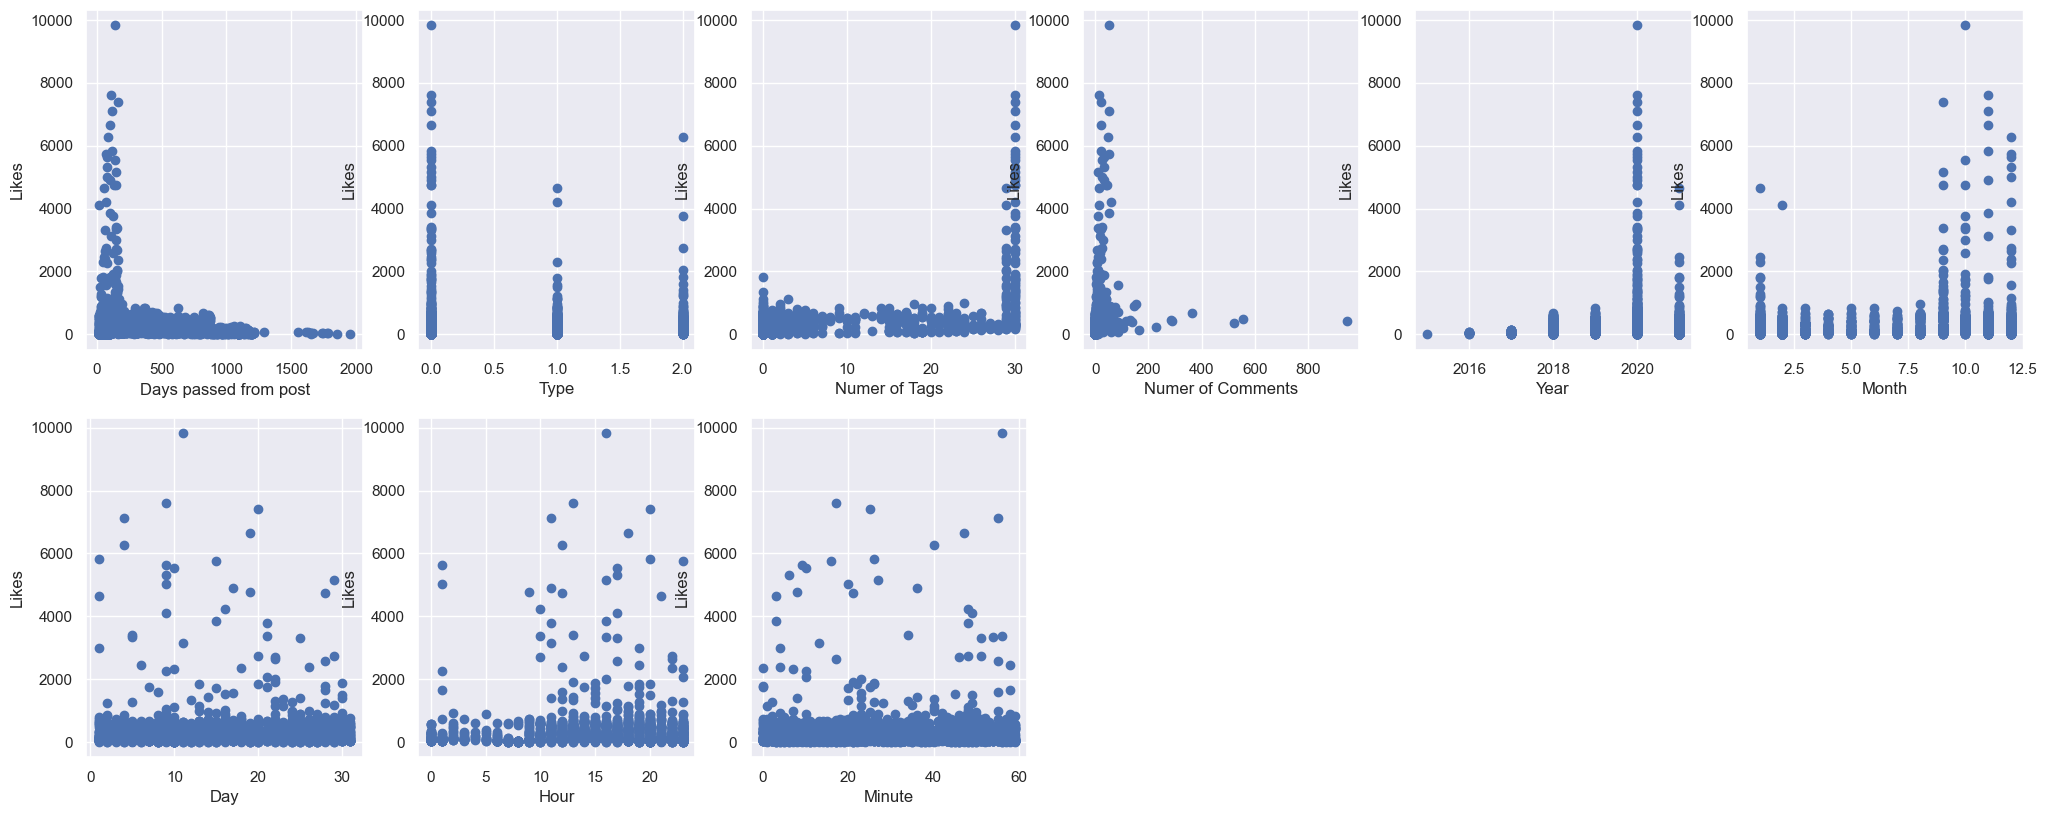

In [640]:
# Checking relationship between features and target variable
plt.figure(figsize=(25,15))
features = list(X)
for i,col in enumerate(features):
    plt.subplot(3,6,i+1)
    plt.scatter(X[col], y, marker = 'o')
    plt.xlabel(col)
    plt.ylabel('Likes')

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

There is a relation between likes and days passed from post as the number of likes is increasing as the number of days is decreasing from the post. Same is observed fro number of comments and Inverse is observed for Number of tags and Likes. Rest of the plots doesn't show any significant relations.


    15- Display the target distribution using histogram (1 points)

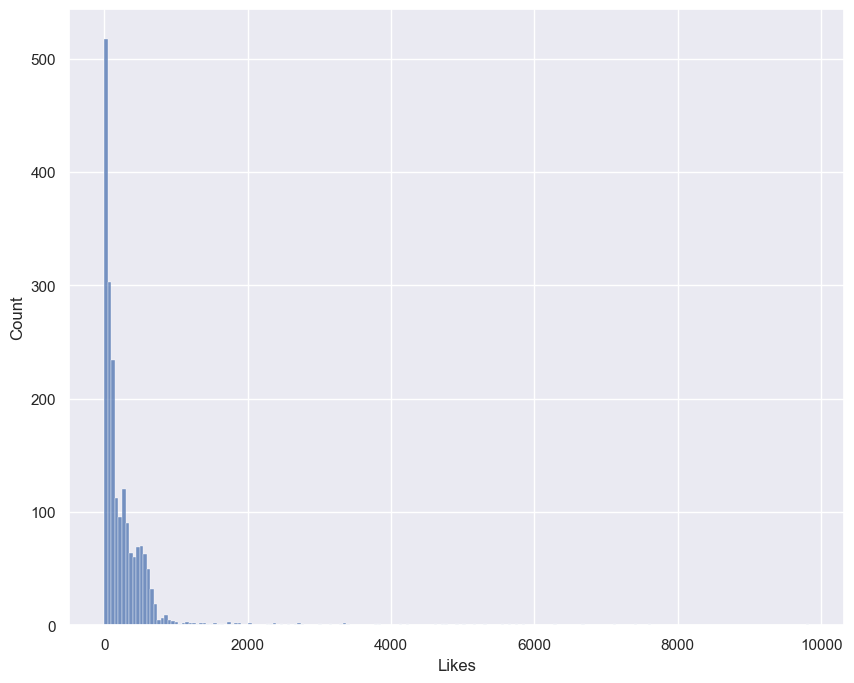

In [643]:
# Histogram of 'Likes'
sns.histplot(data=y)
plt.show()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

The distribution is varying a lot. Not a normal distribution. 

    17-Transfer the target y into log to have the normal distributions: (1 point)

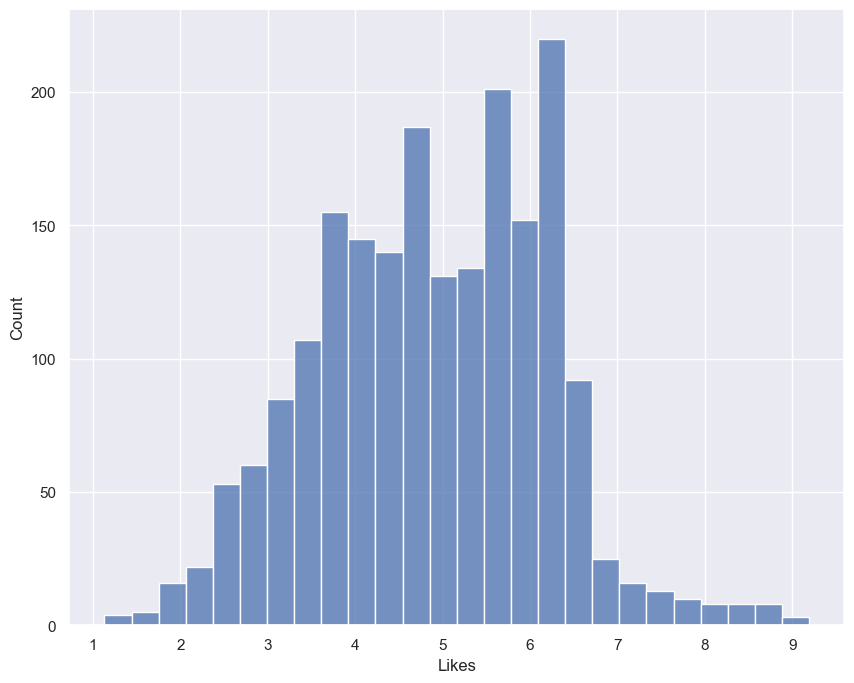

In [648]:
#transfer the target y into log
y = np.log(y+0.1)

sns.histplot(data=y)
plt.show()

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [652]:
# Splitting the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 46)
# print the sizes of our training and test set:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 9)
(400, 9)
(1600,)
(400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [655]:
# Linear Regression using Pipeline and CV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LinearRegression())
MSE = cross_val_score(pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error')
print("Average 10-fold CV MSE score: " + str(np.absolute((np.mean(MSE)))))

Average 10-fold CV MSE score: 1.1873620686978363


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [658]:
# Ridge Regression using pipeline and CV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_values = [10**i for i in [-3, -2, 1, 2, 3]]
import warnings
with warnings.catch_warnings():
  # ignore all caught warnings
  warnings.filterwarnings("ignore")
  param_grid = {'alpha': alpha_values}
  grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
  grid.fit(X_train,y_train)
  best_score = float(format(grid.best_score_, '.4f'))
  print('Best MSE score: {:.4f}'.format(np.absolute((grid.best_score_))))
  print('Best alpha for Ridge:',grid.best_params_)

Best MSE score: 0.9058
Best alpha for Ridge: {'alpha': 0.001}


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [661]:
# Lasso Regression using pipeline and CV
from sklearn.linear_model import Lasso

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")

    param_grid = {'alpha': alpha_values}  # Same search grid for alpha

    grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
    grid.fit(X_train, y_train)
    best_score = float(format(grid.best_score_, '.4f'))
    print('Best MSE score: {:.4f}'.format(np.absolute((grid.best_score_))))
    print('Best alpha for Lasso:', grid.best_params_)

Best MSE score: 0.9081
Best alpha for Lasso: {'alpha': 0.001}


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [665]:
# Huber Regression using pipeline and CV
from sklearn.linear_model import HuberRegressor

pipeline_huber = make_pipeline(StandardScaler(), HuberRegressor())
scores_huber = cross_val_score(pipeline_huber, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
#force scores to be positive
print("Average 10-Fold CV MSE Score for Huber regression: {}".format(np.absolute((np.mean(scores_huber)) )))

Average 10-Fold CV MSE Score for Huber regression: 0.8931750462324576


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [668]:
# RANSAC Regression using pipeline and CV
from sklearn.linear_model import RANSACRegressor

pipeline_ransac = make_pipeline(StandardScaler(),RANSACRegressor(random_state=46))
scores_RANSAC = cross_val_score(pipeline_ransac,X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
#force scores to be positive
print("Average 10-Fold CV MSE Score for RANSAC regression: {}".format(np.absolute((np.mean(scores_RANSAC )))))

Average 10-Fold CV MSE Score for RANSAC regression: 1.0653722341943257


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

-- The Huber Regression model performed very well as the average MSE score generated using that model was lower than all other models. We confirmed this using other random_state given during splitting as well.

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [678]:
# Fitting the final model using HuberRegressor()
scaler = StandardScaler()

# Fit the model on the training data using the scaled data in the pipeline
Final_model = make_pipeline(StandardScaler(), HuberRegressor())

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [681]:
# Finding the MSE values
from sklearn.metrics import mean_squared_error

# Use the final model pipeline to predict the number of likes on the training set
y_train_pred = pipeline.predict(X_train)

# Compute the Mean Squared Error (MSE) for the predictions on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Print the MSE for the training set
print(f"MSE for the final training set: {mse_train:.4f}")

# Use the final model pipeline to predict the number of likes on the test set

y_pred = pipeline.predict(X_test)

# Compute the Mean Squared Error (MSE) for the predictions
mse_test = mean_squared_error(y_test, y_pred)

# Print the MSE for the test set
print(f"MSE for the final test set: {mse_test:.4f}")

MSE for the final training set: 1.1609
MSE for the final test set: 1.3350


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

A model's performance is judged based on the MSE score it genrates from the dataset given. As Huber Regression model produced less MSE, we selected that model. Moreover different methods have different use cases. For example, Huber regression deals better with outliers, shrinkage method deals with overfitting and traditional linear regression is used to understand relationships among variables (dependent and independent). A regression algorithm works better for our dataset because here we are predicting a continuous value (Likes).

Yes, Robust regression algorithms, especially Huber Regression method outperformed linear regression and shrinkage methods. The instagram dataset was not distributed normally and had outliers in some of the features and also in target variable. Since, Huber Regression uses Huber loss instead of squared error loss, it handles the outliers better than other methods. 

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---